In [1]:
import pandas as pd 
import seaborn as sns 
import sqlite3
import numpy as np
from plotly import express as px

In [4]:
with sqlite3.connect("../tickets.db") as conn: 
    cmd = \
        """
        SELECT g.*, e.price, e.extractTime, e.ticket_count FROM extraction e
        LEFT JOIN games g on e.id = g.id
        """
    df = pd.read_sql_query(cmd, conn)
df['time'], df['extractTime'] = pd.to_datetime(df['time']), pd.to_datetime(df['extractTime'])
df['days_to_game'] = (df['time'] - df['extractTime'])
df['days_to_game'] = df['days_to_game'].apply(lambda X: X.days)
df = df.dropna()
def diff_from_initial(x):
    initial = x.to_numpy()[0]
    return (initial - x)/x
def diff_from_max(x):
    max_ = x.max()
    return (max_ - x)/x
df["diff_initial"] = df.groupby("unique_name")["price"].transform(diff_from_initial)
df["diff_max"] = df.groupby("unique_name")["price"].transform(diff_from_max)
dodgers = df[df['homeTeam'] == 'Los Angeles Dodgers']
giants = df[df['homeTeam'] == 'San Francisco Giants']
angels = df[df['homeTeam'] == 'Los Angeles Angels']
df

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial,diff_max
0,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,58.62,2021-06-08 17:51:48.284897,0,2.0,0.000000,0.814057
1,104725408.0,2021-06-12,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-12,29.16,2021-06-08 17:51:48.284897,0,3.0,0.000000,0.451303
2,104725409.0,2021-06-13,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-13,28.04,2021-06-08 17:51:48.284897,0,4.0,0.000000,0.231455
3,104724531.0,2021-06-14,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,35.55,2021-06-08 17:51:48.284897,0,5.0,0.000000,0.000000
4,104725410.0,2021-06-15,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,24.99,2021-06-08 17:51:48.284897,0,6.0,0.000000,0.328131
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,104738380.0,2021-09-29,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,20.41,2021-07-14 00:42:27.265461,2693,76.0,-0.158746,0.000000
9595,104736599.0,2021-09-30,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,21.64,2021-07-14 00:42:27.265464,2666,77.0,-0.206562,0.340573
9596,104736601.0,2021-10-01,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,33.92,2021-07-14 00:42:27.265467,2825,78.0,0.517099,0.517099
9597,104738382.0,2021-10-02,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,54.76,2021-07-14 00:42:27.265470,2940,79.0,0.202155,0.202155


In [14]:
ex = dodgers.groupby("days_to_game")[["diff_initial", "diff_max"]].mean().reset_index()
ex[ex["days_to_game"] < 50].to_json("../dodgers_tickets.json", orient='records')

In [10]:
dodgers.to_json("../dodgers_tickets.json", orient='records')

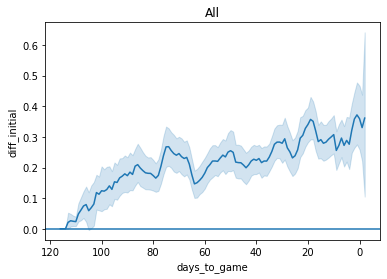

In [4]:
ax = sns.lineplot(x = "days_to_game", y = "diff_initial", data = df,)
ax.axhline(0)
ax.set_title("All")
ax = ax.invert_xaxis()

In [3]:
c = dodgers.groupby("days_to_game")['diff_initial'].mean().reset_index()
ax = px.line(c, x = "days_to_game", y = "diff_initial",)
ax.show()

1.0

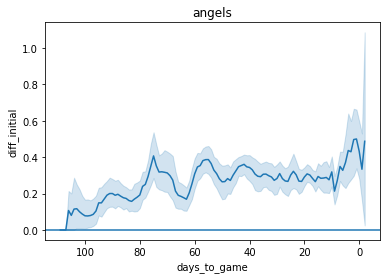

In [3]:
ax = sns.lineplot(x = "days_to_game", y = "diff_initial", data = angels)
ax.axhline(0)
ax.set_title("angels")
ax = ax.invert_xaxis()
dodgers.groupby("days_to_game")["diff_initial"].mean().idxmax()

In [12]:
dodgers[dodgers["id"] == 104724575.0]

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial
14,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-08 17:51:48.284897,0,32.0,0.000000
169,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-09 12:10:15.524405,0,31.0,0.000000
323,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-10 00:25:10.995267,0,30.0,0.000000
477,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-10 12:10:33.528977,0,30.0,0.000000
630,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-11 04:00:07.429662,3067,29.0,0.000000
783,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-11 12:09:17.664544,3063,29.0,0.000000
936,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-12 00:19:18.579301,3062,28.0,0.000000
1088,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-12 12:08:54.466681,3067,28.0,0.000000
1240,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-13 00:24:03.636304,3072,27.0,0.000000
1391,104724575.0,2021-07-11,Arizona Diamondbacks at Los Angeles Dodgers,Los Angeles Dodgers,Arizona Diamondbacks,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.01,2021-06-13 12:09:13.396484,3074,27.0,0.000000


In [8]:
giants[giants["awayTeam"] == "Los Angeles Dodgers"].groupby("unique_name")[["price"]].aggregate(["last", "first"])

price       
                                                     last  first
unique_name                                                     
Los Angeles Dodgers at San Francisco Giants: 20...  44.96  69.51
Los Angeles Dodgers at San Francisco Giants: 20...  42.51  70.13
Los Angeles Dodgers at San Francisco Giants: 20...  56.27  89.14
Los Angeles Dodgers at San Francisco Giants: 20...  62.07  75.65
Los Angeles Dodgers at San Francisco Giants: 20...  63.38  87.93
Los Angeles Dodgers at San Francisco Giants: 20...  63.38  92.21

In [16]:
giants[giants["awayTeam"] == "Los Angeles Dodgers"]

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial
120,104738361.0,2021-07-27,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.51,2021-06-08 17:51:49.782776,0,48.0,0.000000
121,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,70.13,2021-06-08 17:51:49.782776,0,49.0,0.000000
122,104736560.0,2021-07-29,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,89.14,2021-06-08 17:51:49.782776,0,50.0,0.000000
139,104738373.0,2021-09-03,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,75.65,2021-06-08 17:51:49.782776,0,86.0,0.000000
140,104736584.0,2021-09-04,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,87.93,2021-06-08 17:51:49.782776,0,87.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7989,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,42.51,2021-07-08 00:20:46.098635,3495,19.0,0.649729
7990,104736560.0,2021-07-29,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,56.27,2021-07-08 00:20:46.098637,2562,20.0,0.584148
8007,104738373.0,2021-09-03,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,62.07,2021-07-08 00:20:46.098760,3664,56.0,0.218785
8008,104736584.0,2021-09-04,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,63.38,2021-07-08 00:20:46.098761,3112,57.0,0.387346


In [16]:
dodgers.groupby("unique_name")[["price"]].mean().sort_values("price").reset_index()

,unique_name,price
0,Arizona Diamondbacks at Los Angeles Dodgers: 2...,21.640000
1,Atlanta Braves at Los Angeles Dodgers: 2021-08-31,26.550000
2,Texas Rangers at Los Angeles Dodgers: 2021-06-13,27.234000
3,Arizona Diamondbacks at Los Angeles Dodgers: 2...,27.761111
4,Philadelphia Phillies at Los Angeles Dodgers: ...,27.783333
5,Philadelphia Phillies at Los Angeles Dodgers: ...,27.843077
6,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.010000
7,San Francisco Giants at Los Angeles Dodgers: 2...,29.928889
8,Colorado Rockies at Los Angeles Dodgers: 2021-...,31.298333
9,Arizona Diamondbacks at Los Angeles Dodgers: 2...,32.056667
